In [2]:
import pickle
import numpy as np 
import pandas as pd
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib as mpl
import os 
import glob

mpl.rcParams['figure.figsize'] = (5,5)
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams["image.origin"] = 'lower'

In [3]:
model_dir = "../models/v6_detseparated/"
model_name = "v6_detseparated"

# Data preparation
## Input: 
- E seed
- eta,phi,z seed
- E cluster
- delta_eta,delta_phi,

Filter only windows with the calo

In [4]:
files_ele = "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/electrons/numpy_v8/training/"
files_gamma = "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/gammas/numpy_v8/training/"

In [ ]:
datas_ele = []

for f in glob.glob(files_ele+"*.pkl"):
    d = pickle.load(open(f, "rb"))   
    datas_ele.append(d[d.is_seed == False])
    
data_ele = pd.concat(datas_ele, ignore_index=True)
data_ele["particle"] = "electron"
print("N events ele: ",len(data_ele))

datas_gamma = []
for f in glob.glob(files_gamma+"*.pkl"):
    d = pickle.load(open(f, "rb"))  
    datas_gamma.append(d[d.is_seed==False])
    
data_gamma = pd.concat(datas_gamma, ignore_index=True)
data_gamma["particle"] = "gamma"
print("N events gamma: ",len(data_gamma))

if data_ele.shape[0]> data_gamma.shape[0]:
    data = pd.concat([data_gamma, data_ele.iloc[0:len(data_gamma)]], ignore_index=True)
else:
    data = pd.concat([data_gamma.iloc[0:len(data_ele)], data_ele], ignore_index=True)

N events ele:  23603630


Balance gamma and electron

In [ ]:
data_EB = data[abs(data.seed_eta)<1.479]
data_EE = data[abs(data.seed_eta)>=1.479]

In [5]:
print("Sample in EB:", len(data[abs(data.seed_eta) <1.479]))
print("Sample in EE:", len(data[abs(data.seed_eta) >=1.479]))
print("Sample in EB in SC:", len(data[(abs(data.seed_eta) <1.479)&(data.in_scluster)]))
print("Sample in EE in SC:", len(data[(abs(data.seed_eta) >=1.479)&(data.in_scluster)]))
print("N in supercluster: ", len(data[ data.in_scluster]))
print("N out supercluster: ", len(data[data.in_scluster == False]))
w = len(data[(data.is_seed == False) & (data.in_scluster == False)]) / len(data[(data.is_seed == False) & (data.in_scluster==True)])
print(w)

Sample in EB: 2188030
Sample in EE: 3671292
Sample in EB in SC: 794754
Sample in EE in SC: 393750
N in supercluster:  1188504
N out supercluster:  4670818
3.929997711408628


In [6]:
print("caloMatch samples: ", len(data[data.is_calo_matched]))
print("Not caloMatch samples: ", len(data[data.is_calo_matched ==False]))

caloMatch samples:  3133915
Not caloMatch samples:  2725407


## Check plots

In [9]:
data_in = data[ (data.is_seed == False) & data.in_scluster]
data_out =  data[(data.is_seed == False) & (data.in_scluster == False)]

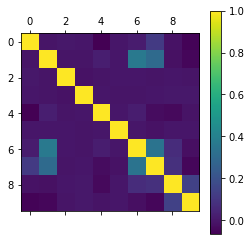

In [11]:
plt.matshow(data_in[["et_cluster", "et_seed", "seed_eta", "seed_phi", "cluster_deta", "cluster_dphi", "seed_nxtals","cl_nxtals", "seed_swissCross", "cl_swissCross"]].corr(), cmap="viridis")
plt.colorbar()

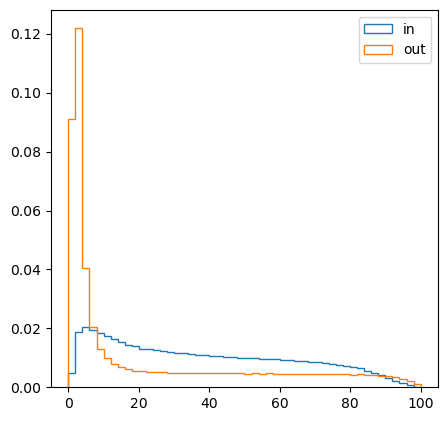

In [12]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.et_seed, histtype="step", density=True, bins=50, label="in", range=[0,100])
plt.hist(data_out.et_seed, histtype="step", density=True, bins=50, label="out", range=[0,100])
plt.legend()

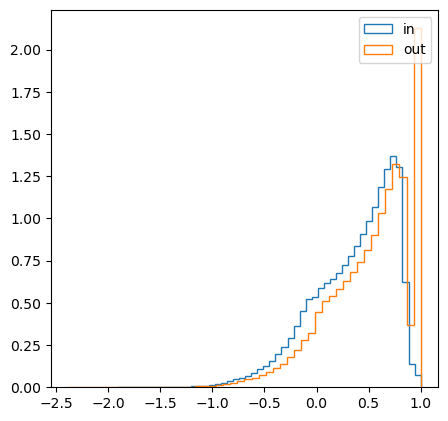

In [13]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.seed_swissCross, histtype="step", density=True, bins=50, label="in", )
plt.hist(data_out.seed_swissCross, histtype="step", density=True, bins=50, label="out")
plt.legend()

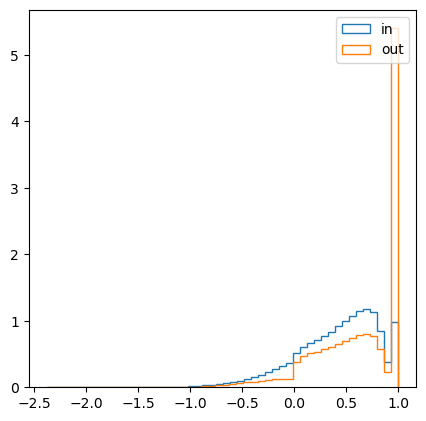

In [14]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.cl_swissCross, histtype="step", density=True, bins=50, label="in", )
plt.hist(data_out.cl_swissCross, histtype="step", density=True, bins=50, label="out")
plt.legend()

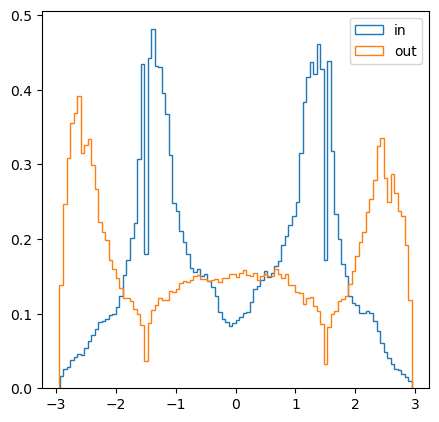

In [15]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.seed_eta, histtype="step", density=True, bins=100, label="in")
plt.hist(data_out.seed_eta, histtype="step", density=True, bins=100, label="out")
plt.legend()

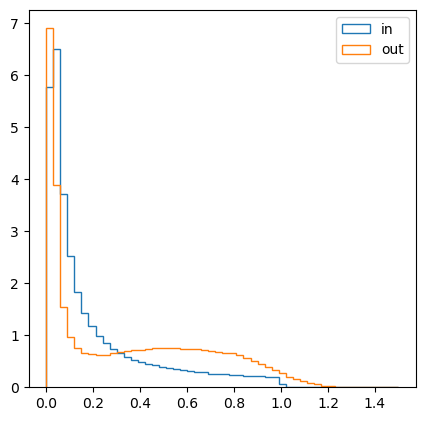

In [16]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.et_cluster/data_in.et_seed, histtype="step", density=True, bins=50, label="in", range=(0,1.5))
plt.hist(data_out.et_cluster/data_out.et_seed, histtype="step", density=True, bins=50, label="out",range=(0,1.5))
plt.legend()

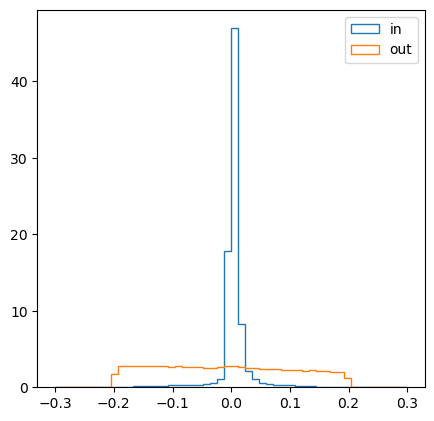

In [17]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.cluster_deta, histtype="step", density=True, bins=50, label="in", range=(-0.3,0.3))
plt.hist(data_out.cluster_deta, histtype="step", density=True, bins=50, label="out",range=(-0.3,0.3))
plt.legend()

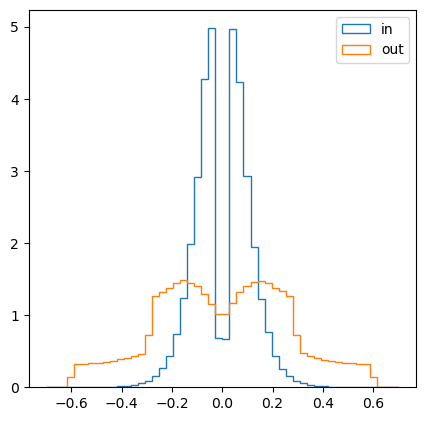

In [18]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.cluster_dphi, histtype="step", density=True, bins=50, label="in", range=(-0.7,0.7))
plt.hist(data_out.cluster_dphi, histtype="step", density=True, bins=50, label="out",range=(-0.7,0.7))
plt.legend()

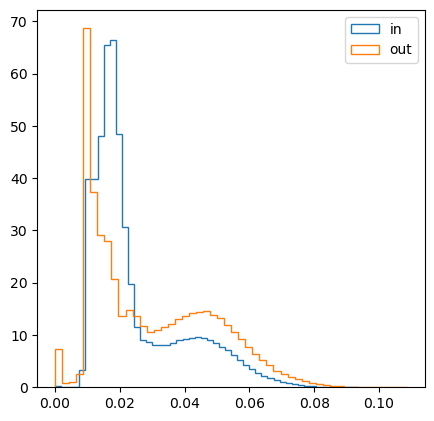

In [19]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.seed_f5_sigmaIphiIphi, histtype="step", density=True, bins=50, label="in", )
plt.hist(data_out.seed_f5_sigmaIphiIphi, histtype="step", density=True, bins=50, label="out")
plt.legend()

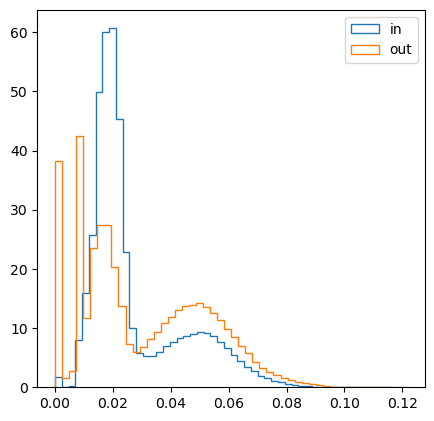

In [20]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.cl_f5_sigmaIphiIphi, histtype="step", density=True, bins=50, label="in", )
plt.hist(data_out.cl_f5_sigmaIphiIphi, histtype="step", density=True, bins=50, label="out")
plt.legend()

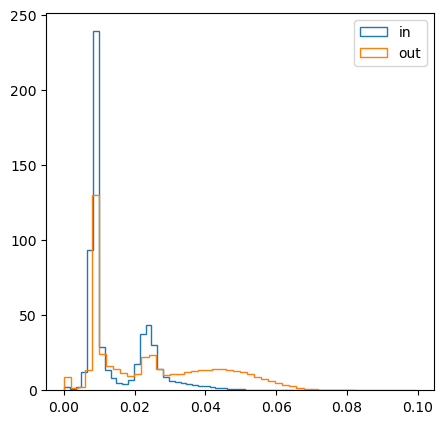

In [21]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.seed_f5_sigmaIetaIeta, histtype="step", density=True, bins=50, label="in", )
plt.hist(data_out.seed_f5_sigmaIetaIeta, histtype="step", density=True, bins=50, label="out")
plt.legend()

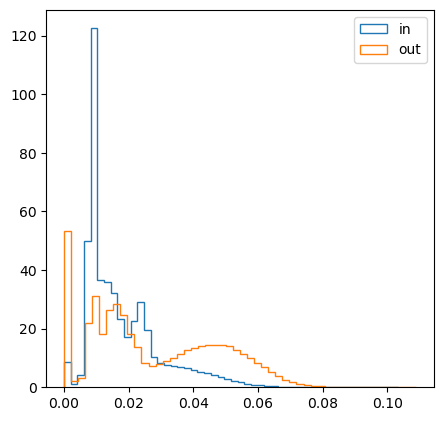

In [22]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.cl_f5_sigmaIetaIeta, histtype="step", density=True, bins=50, label="in", )
plt.hist(data_out.cl_f5_sigmaIetaIeta, histtype="step", density=True, bins=50, label="out")
plt.legend()

## Weights by DeltaPhi

In [7]:
data.columns

Index(['cl_f5_r9', 'cl_f5_sigmaIetaIeta', 'cl_f5_sigmaIetaIphi',
       'cl_f5_sigmaIphiIphi', 'cl_nxtals', 'cl_swissCross', 'cluster_deta',
       'cluster_dphi', 'cluster_iz', 'en_cluster', 'en_seed', 'en_true',
       'et_cluster', 'et_seed', 'et_true', 'in_mustache', 'in_scluster',
       'index', 'is_calo_matched', 'is_seed', 'max_dr_cluster',
       'max_en_cluster', 'mustache_seed_index', 'nclusters', 'seed_eta',
       'seed_f5_r9', 'seed_f5_sigmaIetaIeta', 'seed_f5_sigmaIetaIphi',
       'seed_f5_sigmaIphiIphi', 'seed_iz', 'seed_nxtals', 'seed_phi',
       'seed_swissCross', 'window_index', 'particle'],
      dtype='object')

In [8]:
cols = ["seed_eta", "seed_phi", "seed_iz","en_seed","et_seed",
        "cluster_deta", "cluster_dphi", "en_cluster", "et_cluster",
       "seed_f5_r9", "seed_f5_sigmaIetaIeta","seed_f5_sigmaIetaIphi","seed_f5_sigmaIphiIphi","seed_swissCross","seed_nxtals",
        "cl_f5_r9", "cl_f5_sigmaIetaIeta","cl_f5_sigmaIetaIphi","cl_f5_sigmaIphiIphi","cl_swissCross", "cl_nxtals"]

In [53]:
data = data_EE

In [54]:
X = data[ cols ].values
truth = data[["in_scluster"]].values
y = np.array(truth[:], dtype=int)

In [55]:
w = len(data[(data.is_seed == False) & (data.in_scluster == False)]) / len(data[(data.is_seed == False) & (data.in_scluster==True)])
print(w)

8.32391619047619


In [56]:
data["w"] = data.in_scluster.apply(lambda a: w if a else 1.)
weight = data.w.values

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
os.makedirs("../models/v6_detseparated/", exist_ok = True)
pickle.dump(scaler, open("../models/v6_detseparated/scaler_model1_EB.pkl", "wb"))

In [57]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
os.makedirs("../models/v6_detseparated/", exist_ok = True)
pickle.dump(scaler, open("../models/v6_detseparated/scaler_model1_EE.pkl", "wb"))

In [68]:
scaler.mean_

array([-9.48937722e-02, -2.59092069e-02, -3.23802034e-02,  8.54387012e+01,
        1.95493967e+01, -7.99008024e-03,  1.68780274e-05,  8.92748605e+00,
        1.92283524e+00,  1.08804190e+00,  3.39450646e-02,  1.85485538e-05,
        4.13554904e-02,  4.96716655e-01,  5.44590774e+00,  4.09401210e+00,
        3.71462585e-02,  4.80538918e-05,  4.39461957e-02,  5.70297494e-01,
        3.15806715e+00])

In [69]:
scaler.scale_

array([2.27502784e+00, 1.80358311e+00, 9.99475624e-01, 1.25874656e+02,
       2.62122915e+01, 1.01794340e-01, 1.81101293e-01, 6.05398279e+00,
       1.77231292e+00, 5.03589571e-01, 1.40048073e-02, 4.14562658e-04,
       1.53689902e-02, 4.13270103e-01, 5.68762983e+00, 9.93354108e+00,
       1.65018741e-02, 5.45041026e-04, 1.80243836e-02, 4.37347302e-01,
       4.28826919e+00])

In [58]:
X_train, X_val, y_train, y_val, w_train, w_val = train_test_split(X_scaled, y, weight, test_size=0.30)

# Training

In [31]:
# Import all the required Libraries
import tensorflow
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, Reshape, Flatten, Deconvolution2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
from keras import callbacks
from keras import backend as K
from keras import regularizers
from keras.callbacks import *

Using TensorFlow backend.


In [61]:
model = Sequential()
model.add(Dense(100, input_dim=X_val.shape[1], activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.05))
model.add(Dense(100, activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.05))
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.05))
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.05))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer='adagrad',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               2200      
_________________________________________________________________
dropout_13 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_15 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
__________

In [59]:
model = Sequential()
model.add(Dense(200, input_dim=X_val.shape[1], activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.1))
model.add(Dense(200, activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.1))
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.05))
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.05))
ùmodel.add(Dense(50, activation="relu"))
model.add(Dropout(0.01))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer='adagrad',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

NameError: name 'ùmodel' is not defined

In [81]:
import math
def step_decay(epoch):
    initial_lrate = 0.3
    drop = 0.65
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    if lrate < 0.005: return 0.005
    return lrate

In [49]:
auto_save = ModelCheckpoint(model_dir+ "/model1_EB.hd5", monitor='val_loss', 
                    verbose=1, save_best_only=True, save_weights_only=False, 
                    mode='auto', period=3)

early_stop = EarlyStopping(monitor='val_loss', min_delta=0.0001, 
                            patience=20, verbose=1)


#lr_scheduler = callbacks.LearningRateScheduler(step_decay, verbose=1)

history = model.fit(
            X_train, y_train,
            sample_weight = w_train,
            batch_size = 2048,
            epochs=400,
            shuffle=True,
            validation_data = (X_val, y_val, w_val),
            callbacks = [early_stop, auto_save, ] #lr_scheduler
            )

Train on 1750424 samples, validate on 437606 samples
Epoch 1/400
1750424/1750424 [==============================] - 16s 9us/step - loss: 0.2337 - acc: 0.9586 - val_loss: 0.1272 - val_acc: 0.9699
Epoch 2/400
1750424/1750424 [==============================] - 16s 9us/step - loss: 0.1214 - acc: 0.9677 - val_loss: 0.1151 - val_acc: 0.9670
Epoch 3/400
1750424/1750424 [==============================] - 16s 9us/step - loss: 0.1139 - acc: 0.9687 - val_loss: 0.1087 - val_acc: 0.9704

Epoch 00003: val_loss improved from inf to 0.10872, saving model to ../models/v6_detseparated//model1_EE.hd5
Epoch 4/400
1750424/1750424 [==============================] - 16s 9us/step - loss: 0.1101 - acc: 0.9694 - val_loss: 0.1158 - val_acc: 0.9645
Epoch 5/400
1750424/1750424 [==============================] - 16s 9us/step - loss: 0.1077 - acc: 0.9698 - val_loss: 0.1044 - val_acc: 0.9697
Epoch 6/400
1750424/1750424 [==============================] - 16s 9us/step - loss: 0.1060 - acc: 0.9701 - val_loss: 0.1043 - v

1750424/1750424 [==============================] - 19s 11us/step - loss: 0.0906 - acc: 0.9733 - val_loss: 0.0895 - val_acc: 0.9724
Epoch 96/400
1750424/1750424 [==============================] - 16s 9us/step - loss: 0.0905 - acc: 0.9735 - val_loss: 0.0897 - val_acc: 0.9725

Epoch 00096: val_loss did not improve from 0.08847
Epoch 97/400
1750424/1750424 [==============================] - 16s 9us/step - loss: 0.0906 - acc: 0.9734 - val_loss: 0.0891 - val_acc: 0.9748
Epoch 98/400
1750424/1750424 [==============================] - 16s 9us/step - loss: 0.0907 - acc: 0.9733 - val_loss: 0.0898 - val_acc: 0.9745
Epoch 99/400
1750424/1750424 [==============================] - 16s 9us/step - loss: 0.0904 - acc: 0.9734 - val_loss: 0.0883 - val_acc: 0.9737

Epoch 00099: val_loss improved from 0.08847 to 0.08833, saving model to ../models/v6_detseparated//model1_EE.hd5
Epoch 100/400
1750424/1750424 [==============================] - 19s 11us/step - loss: 0.0905 - acc: 0.9734 - val_loss: 0.0904 - va

In [62]:
auto_save = ModelCheckpoint(model_dir+ "/model1_EE.hd5", monitor='val_loss', 
                    verbose=1, save_best_only=True, save_weights_only=False, 
                    mode='auto', period=3)

early_stop = EarlyStopping(monitor='val_loss', min_delta=0.0001, 
                            patience=20, verbose=1)


#lr_scheduler = callbacks.LearningRateScheduler(step_decay, verbose=1)

history = model.fit(
            X_train, y_train,
            sample_weight = w_train,
            batch_size = 2048,
            epochs=400,
            shuffle=True,
            validation_data = (X_val, y_val, w_val),
            callbacks = [early_stop, auto_save, ] #lr_scheduler
            )

Train on 2569904 samples, validate on 1101388 samples
Epoch 1/400
2569904/2569904 [==============================] - 31s 12us/step - loss: 0.3005 - acc: 0.9591 - val_loss: 0.1863 - val_acc: 0.9668
Epoch 2/400
2569904/2569904 [==============================] - 28s 11us/step - loss: 0.1834 - acc: 0.9666 - val_loss: 0.1666 - val_acc: 0.9697
Epoch 3/400
2569904/2569904 [==============================] - 29s 11us/step - loss: 0.1715 - acc: 0.9679 - val_loss: 0.1646 - val_acc: 0.9639

Epoch 00003: val_loss improved from inf to 0.16461, saving model to ../models/v6_detseparated//model1_EE.hd5
Epoch 4/400
2569904/2569904 [==============================] - 30s 12us/step - loss: 0.1658 - acc: 0.9685 - val_loss: 0.1570 - val_acc: 0.9706
Epoch 5/400
2569904/2569904 [==============================] - 30s 12us/step - loss: 0.1625 - acc: 0.9689 - val_loss: 0.1549 - val_acc: 0.9733
Epoch 6/400
2569904/2569904 [==============================] - 30s 12us/step - loss: 0.1601 - acc: 0.9691 - val_loss: 0.1

2569904/2569904 [==============================] - 30s 12us/step - loss: 0.1397 - acc: 0.9721 - val_loss: 0.1376 - val_acc: 0.9743
Epoch 96/400
2569904/2569904 [==============================] - 31s 12us/step - loss: 0.1395 - acc: 0.9721 - val_loss: 0.1363 - val_acc: 0.9731

Epoch 00096: val_loss improved from 0.13651 to 0.13630, saving model to ../models/v6_detseparated//model1_EE.hd5
Epoch 97/400
2569904/2569904 [==============================] - 30s 12us/step - loss: 0.1392 - acc: 0.9721 - val_loss: 0.1372 - val_acc: 0.9758
Epoch 98/400
2569904/2569904 [==============================] - 30s 12us/step - loss: 0.1395 - acc: 0.9722 - val_loss: 0.1370 - val_acc: 0.9703
Epoch 99/400
2569904/2569904 [==============================] - 30s 12us/step - loss: 0.1394 - acc: 0.9722 - val_loss: 0.1363 - val_acc: 0.9726

Epoch 00099: val_loss did not improve from 0.13630
Epoch 100/400
2569904/2569904 [==============================] - 30s 12us/step - loss: 0.1395 - acc: 0.9722 - val_loss: 0.1367 

>>> Computing AUC...
AUC score: 0.9965043098246165
>>> Saving ROC curve...


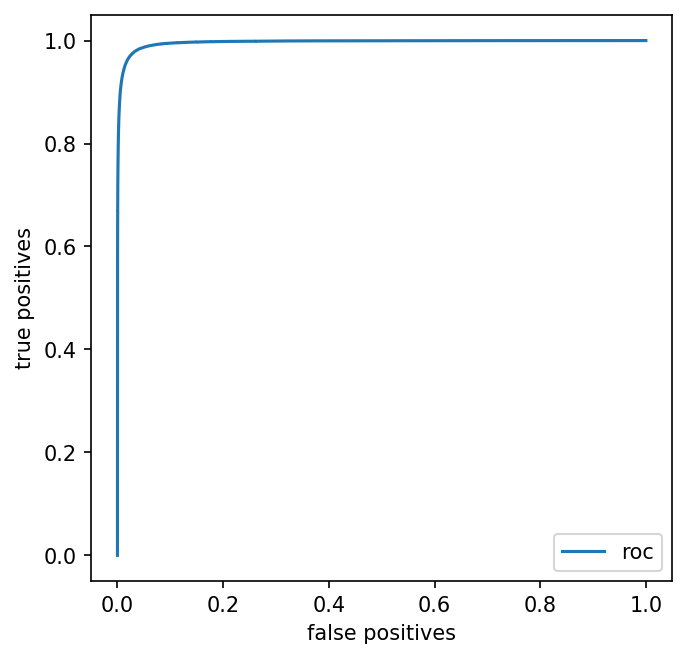

In [63]:
# Evalutation
print(">>> Computing AUC...")

from sklearn.metrics import roc_auc_score, roc_curve

pred = model.predict(X_val,batch_size=2048)
auc = roc_auc_score(y_val, pred, sample_weight=w_val)
print("AUC score: " + str(auc))

print(">>> Saving ROC curve...")
fp , tp, th = roc_curve(y_val, pred, sample_weight=w_val,drop_intermediate=True)
plt.plot(fp, tp, label="roc")
#plt.plot(fp, th, label="threshold")
plt.xlabel("false positives")
plt.ylabel("true positives")
plt.ylim(-0.05,1.05)

plt.legend()

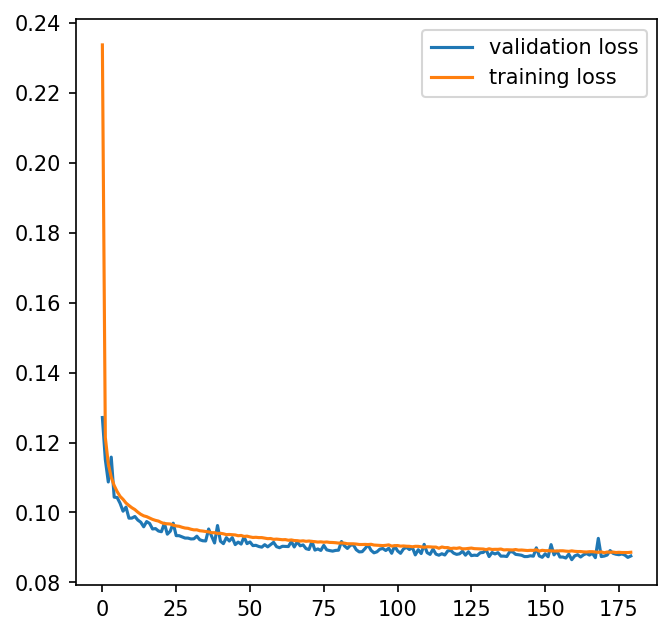

In [51]:
plt.plot(history.epoch, history.history["val_loss"], label="validation loss")
plt.plot(history.epoch, history.history["loss"], label="training loss")
plt.legend()

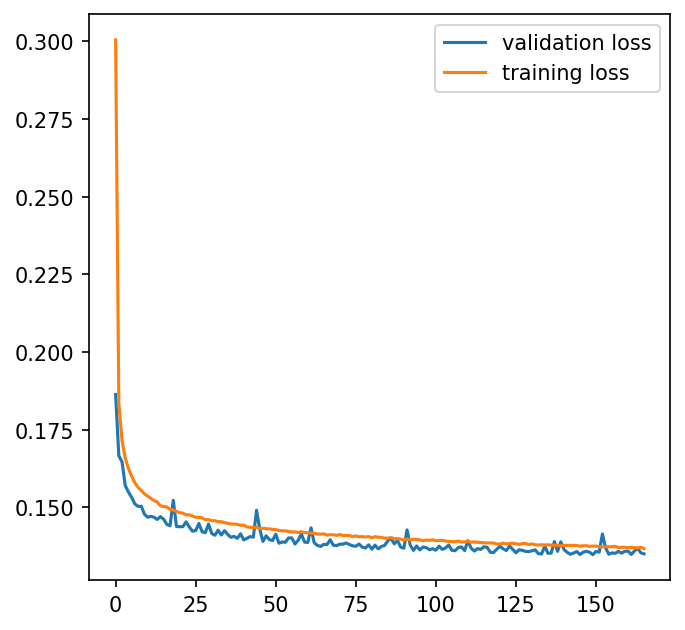

In [64]:
plt.plot(history.epoch, history.history["val_loss"], label="validation loss")
plt.plot(history.epoch, history.history["loss"], label="training loss")
plt.legend()

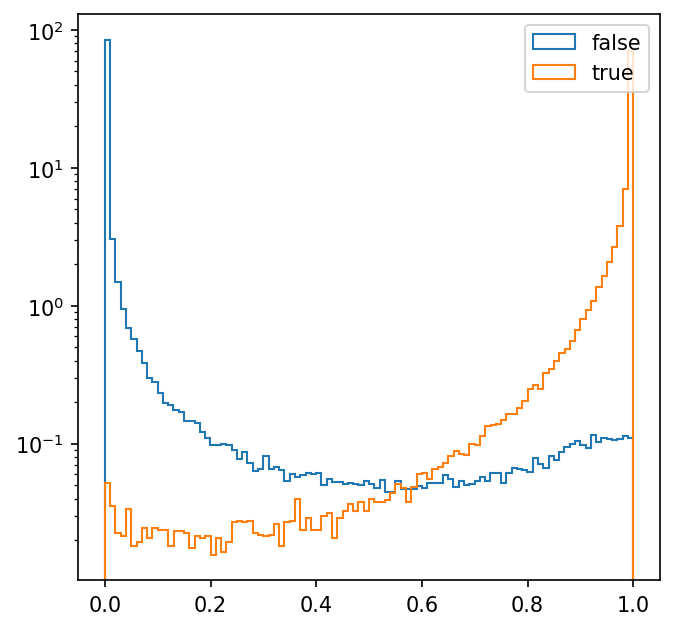

In [52]:
results = model.predict(X_val)
plt.hist(results[y_val==0], bins=100,density=True, label="false", histtype="step")
plt.hist(results[y_val==1], bins=100, density=True, label="true", histtype="step")
plt.yscale("log")
plt.legend()

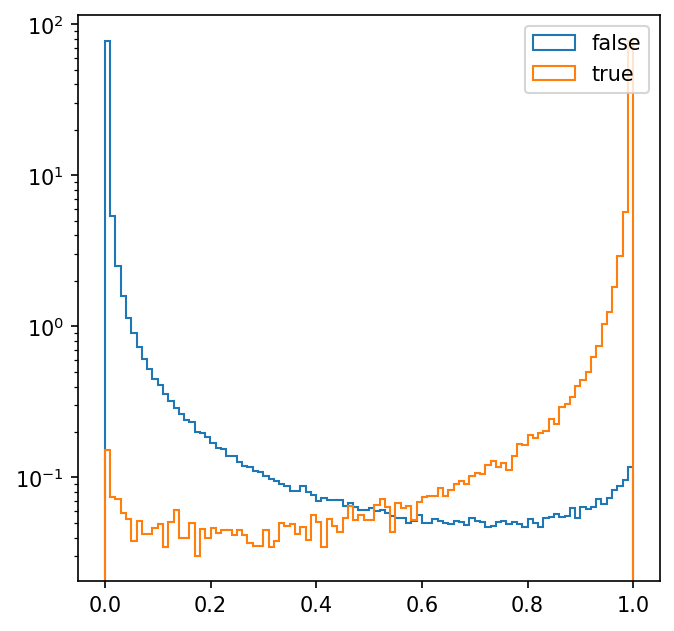

In [65]:
results = model.predict(X_val)
plt.hist(results[y_val==0], bins=100,density=True, label="false", histtype="step")
plt.hist(results[y_val==1], bins=100, density=True, label="true", histtype="step")
plt.yscale("log")
plt.legend()

# Some plots

In [1]:
from keras.models import load_model
model = load_model("models/model11_balanced_100_80_50.hd5")
scaler = pickle.load(open("models/scaler_gamma_electrons.pkl", "rb"))

Using TensorFlow backend.


OSError: Unable to open file (unable to open file: name = 'models/model11_balanced_100_80_50.hd5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [27]:
fp , tp, th = roc_curve(y_test, pred)
fig, ax1 = plt.subplots(figsize=(7,6), dpi=100)
ax1.plot(fp, tp, label="roc", color="blue")

ax1.set_xlabel("Bkg contamination", fontsize=18)
ax1.set_ylabel("Signal efficiency", fontsize=18, color="blue")
ax1.set_ylim(0.850, 1.01)
ax1.set_xlim(0, 0.06)
#ax1.plot([0,1],[1,1],"b--")
ax1.tick_params("y",labelsize="large", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(fp, th, label="threshold", color="red")
ax2.tick_params(axis='y', labelcolor="red", labelsize="large")
ax2.set_ylabel("Threshold", fontsize=18, color="red")
ax2.set_ylim(0, 1)
ax1.grid()
#ax2.grid(linestyle="dashed", color="red")

ax2.plot([0.01, 0.01], [0, 2], "g--")
ax2.set_yticks(np.arange(0, 1.1, 0.1))
#ax2.minorticks_on()

ax1.set_title("ROC curve", fontsize=20)
ax2.text(x = 0.048, y = 1.01, s="AUC=0.997", fontsize="large")

fig.tight_layout()

NameError: name 'y_test' is not defined

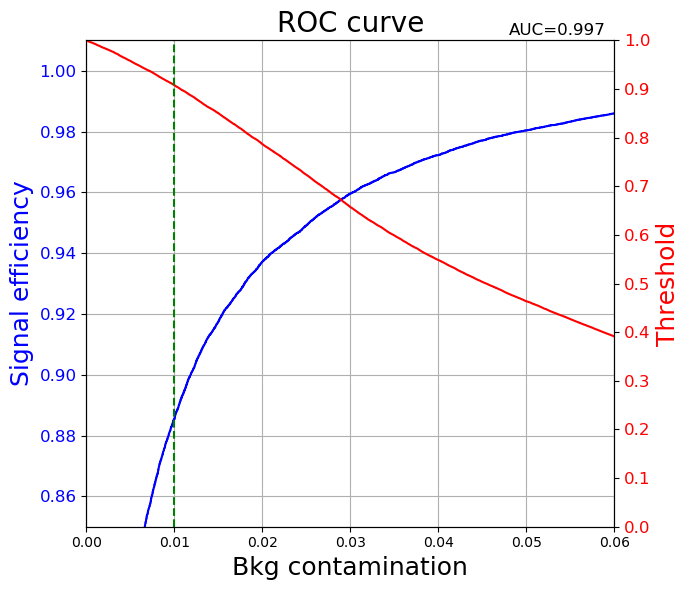

In [36]:
fp , tp, th = roc_curve(y_test, pred)
fig, ax1 = plt.subplots(figsize=(7,6), dpi=100)
ax1.plot(fp, tp, label="roc", color="blue")

ax1.set_xlabel("Bkg contamination", fontsize=18)
ax1.set_ylabel("Signal efficiency", fontsize=18, color="blue")
ax1.set_ylim(0.850, 1.01)
ax1.set_xlim(0, 0.06)
#ax1.plot([0,1],[1,1],"b--")
ax1.tick_params("y",labelsize="large", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(fp, th, label="threshold", color="red")
ax2.tick_params(axis='y', labelcolor="red", labelsize="large")
ax2.set_ylabel("Threshold", fontsize=18, color="red")
ax2.set_ylim(0, 1)
ax1.grid()
#ax2.grid(linestyle="dashed", color="red")

ax2.plot([0.01, 0.01], [0, 2], "g--")
ax2.set_yticks(np.arange(0, 1.1, 0.1))
#ax2.minorticks_on()

ax1.set_title("ROC curve", fontsize=20)
ax2.text(x = 0.048, y = 1.01, s="AUC=0.997", fontsize="large")

fig.tight_layout()